# Bank Loan Analysis Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel("financial_loan.xlsx") 
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,2021-02-09,2021-03-16,2021-03-16,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [6]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [7]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## Total Loan Applications

In [5]:
total_loan_applications = df['id'].count()
print ("Total Loan Applications :",total_loan_applications) 

Total Loan Applications : 38576


### MTD loan applications 

In [9]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application = mtd_data.shape[0]

print(f"mtd loan application (for {latest_issue_date.strftime('%B %Y')} :{mtd_loan_application}")


mtd loan application (for December 2021 :4314


### Total funded Amount 

In [10]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_million = total_funded_amount / 1000000
print(f"total funded amount is $ {total_funded_amount_million:.2f}M")

total funded amount is $ 435.76M


### MTD LOAN FUNDED AMOUNT

In [11]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_funded_amount = mtd_data['loan_amount'].sum()
mtd_loan_funded_amount_millions = mtd_loan_funded_amount / 1000000
print(f"MTD loan funded amount is : $ {mtd_loan_funded_amount_millions:.2f}M")

MTD loan funded amount is : $ 53.98M


### Total Amount Received

In [12]:
total_recieved_amount = df['total_payment'].sum()
total_recieved_amount_million = total_recieved_amount / 1000000
print(f"total received amount is $ {total_recieved_amount_million:.2f}M")

total received amount is $ 473.07M


### MTD Ttal Recieved Amount

In [13]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_recieved_amount = mtd_data['total_payment'].sum()
mtd_loan_recieved_amount_millions = mtd_loan_recieved_amount / 1000000
print(f"MTD loan recieved amount is : $ {mtd_loan_recieved_amount_millions:.2f}M")

MTD loan recieved amount is : $ 58.07M


### Average Interest Rate

In [14]:
average_interes_rate = df['int_rate'].mean()
average_interes_rate_ = average_interes_rate * 100 
print(f"Average Interst Rate is :{average_interes_rate_: .2f}%")

Average Interst Rate is : 12.05%


### Average Debt- To-Income Ratio

In [15]:
average_DTI = df['dti'].mean()*100
print(f"Average Debt- To-Income Ratio  is :{average_DTI: .2f}%")

Average Debt- To-Income Ratio  is : 13.33%


### Good Loans Metrics

In [16]:
good_loan = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
good_loan_applications = good_loan['id'].count()
good_loan_funded_amount = (good_loan['loan_amount'].sum() /1000000)
good_loan_recieved_amount = (good_loan['total_payment'].sum()/1000000)

good_loan_percentage = (good_loan_applications / total_loan_applications)*100 

print(f"good loan application number is : {good_loan_applications}")
print(f"good loan funded amount is  : $ {good_loan_funded_amount:.2f}M")
print(f"good loan received amount is  : $ {good_loan_recieved_amount:.2f}M")
print(f"good loan percentage number is  : {good_loan_percentage}%")




good loan application number is : 33243
good loan funded amount is  : $ 370.22M
good loan received amount is  : $ 435.79M
good loan percentage number is  : 86.17534218166736%


### Bad Loan Metrics

In [17]:
bad_loan = df[df['loan_status'].isin(['Charged Off'])]
bad_loan_applications = bad_loan['id'].count()
bad_loan_funded_amount = (bad_loan['loan_amount'].sum() /1000000)
bad_loan_recieved_amount = (bad_loan['total_payment'].sum()/1000000)

bad_loan_percentage = (bad_loan_applications / total_loan_applications)*100 

print(f"bad loan application number is : {bad_loan_applications}")
print(f"bad loan funded amount is  : $ {bad_loan_funded_amount:.2f}M")
print(f"bad loan received amount is  : $ {bad_loan_recieved_amount:.2f}M")
print(f"bad loan percentage number is  : {bad_loan_percentage:.2f}%")

bad loan application number is : 5333
bad loan funded amount is  : $ 65.53M
bad loan received amount is  : $ 37.28M
bad loan percentage number is  : 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

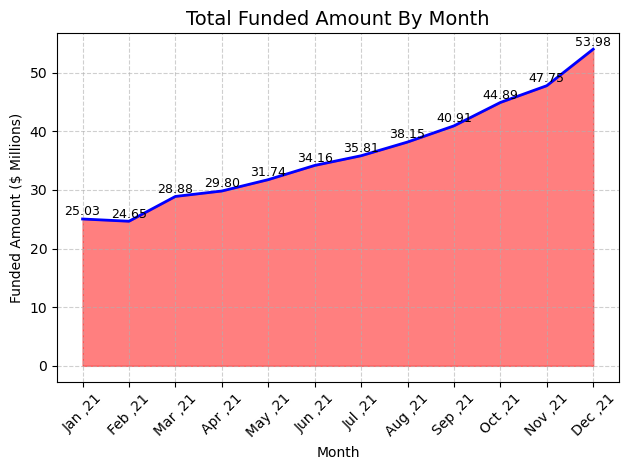

In [18]:
monthly_funded = (
    df. sort_values('issue_date')
    .assign(month_name = lambda x :x['issue_date'].dt.strftime ('%b ,%y'))
    .groupby('month_name' , sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name = 'loan_amount_millions')
)

plt.Figure(figsize=(10,5))
plt.fill_between( x=monthly_funded['month_name'] , y1= monthly_funded['loan_amount_millions'] , y2 = 0 ,color= 'red' , alpha=0.5)
plt.plot(monthly_funded['month_name'] , monthly_funded['loan_amount_millions'], color = 'blue' , linewidth = 2)

for i , row in monthly_funded.iterrows():
    plt.text(i , row['loan_amount_millions']+ 0.1 , f"{row['loan_amount_millions']:.2f}" ,
    ha = 'center' , va = 'bottom' , fontsize = 9 , rotation = 0 ,color = 'black' )

plt.title('Total Funded Amount By Month' , fontsize = 14 , )
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)) , labels=monthly_funded['month_name'] , rotation = 45)
plt.grid(True , linestyle = '--' , alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trend By Recieved Amount 

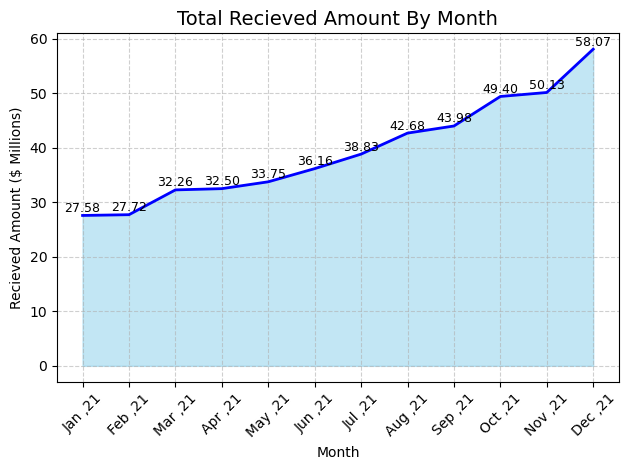

In [19]:
monthly_recieved = (
    df. sort_values('issue_date')
    .assign(month_name = lambda x :x['issue_date'].dt.strftime ('%b ,%y'))
    .groupby('month_name' , sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name = 'recieved_amount_millions')
)

plt.Figure(figsize=(10,5))
plt.fill_between( x = monthly_recieved['month_name'] , y1= monthly_recieved['recieved_amount_millions'] , y2 = 0 ,color= 'skyblue' , alpha=0.5)
plt.plot(monthly_recieved['month_name'] , monthly_recieved['recieved_amount_millions'], color = 'blue' , linewidth = 2)

for i , row in monthly_recieved.iterrows():
    plt.text(i , row['recieved_amount_millions']+ 0.1 , f"{row['recieved_amount_millions']:.2f}" ,
    ha = 'center' , va = 'bottom' , fontsize = 9 , rotation = 0 ,color = 'black' )

plt.title('Total Recieved Amount By Month' , fontsize = 14 , )
plt.xlabel('Month')
plt.ylabel('Recieved Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_recieved)) , labels=monthly_recieved['month_name'] , rotation = 45)
plt.grid(True , linestyle = '--' , alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends By Issue Date for Total Loan Application 

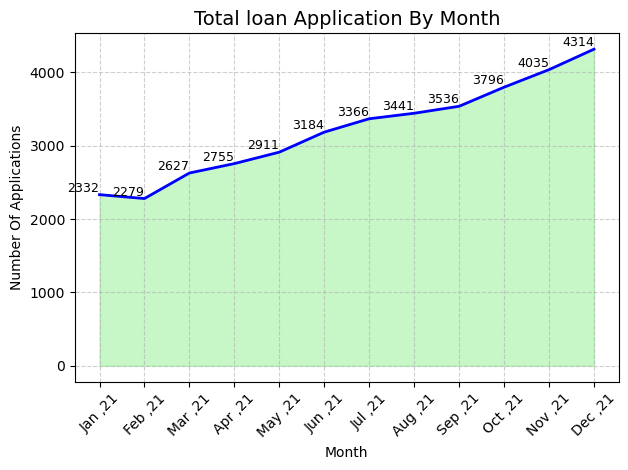

In [20]:
monthly_application = (
    df. sort_values('issue_date')
    .assign(month_name = lambda x :x['issue_date'].dt.strftime ('%b ,%y'))
    .groupby('month_name' , sort=False)['id']
    .count()
    .reset_index(name = 'total_loan_application')
)

plt.Figure(figsize=(10,5))
plt.fill_between( x = monthly_application['month_name'] , y1= monthly_application['total_loan_application'] , y2 = 0 ,color= 'lightgreen' , alpha=0.5)
plt.plot(monthly_application['month_name'] , monthly_application['total_loan_application'], color = 'blue' , linewidth = 2)

for i , row in monthly_application.iterrows():
    plt.text(i , row['total_loan_application']+ 0.1 , f"{row['total_loan_application']}" ,
    ha = 'right' , va = 'bottom' , fontsize = 9 , rotation = 0 ,color = 'black' )

plt.title('Total loan Application By Month' , fontsize = 14  )
plt.xlabel('Month')
plt.ylabel('Number Of Applications')
plt.xticks(ticks=range(len(monthly_application)) , labels=monthly_application['month_name'] , rotation = 45)
plt.grid(True , linestyle = '--' , alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis By State

### Based On Total Funded Amount By State

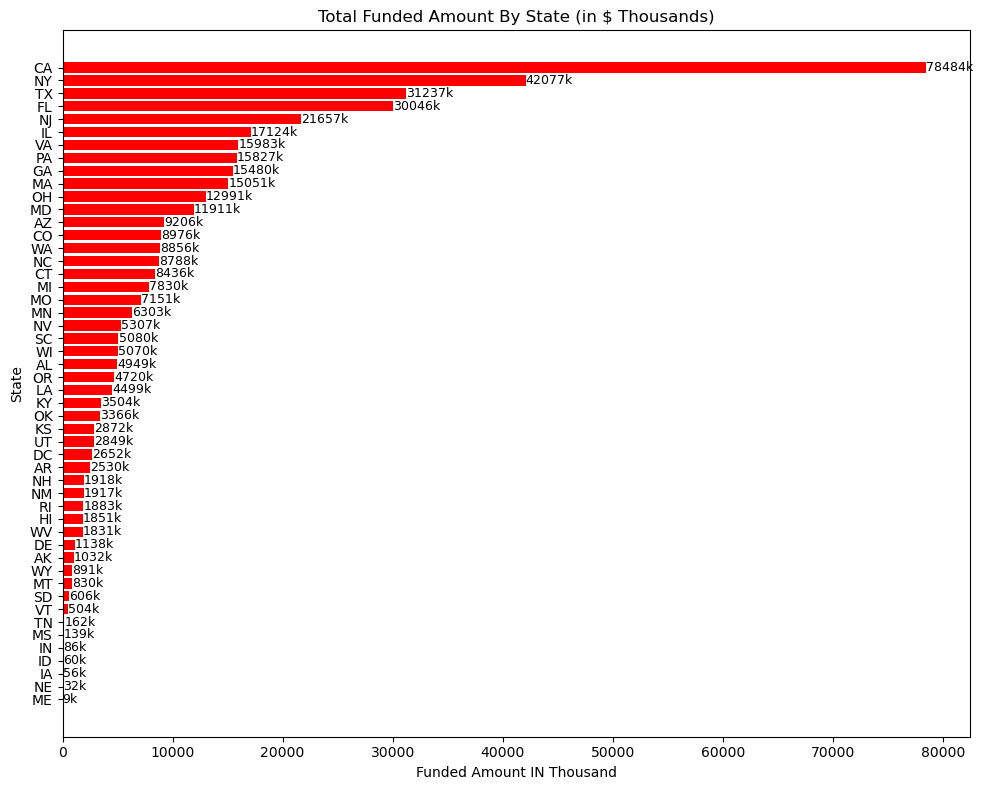

In [21]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousand = state_funding / 1000

plt.figure(figsize=(10,8))
bar =plt.barh(state_funding_thousand.index , state_funding_thousand.values , color = 'red')

for bars in bar :
    width = bars.get_width()
    plt.text(width + 10 , bars.get_y() + bars.get_height() / 2 ,
             f'{width:.0f}k' , va ='center' , fontsize = 9)
    
plt.title('Total Funded Amount By State (in $ Thousands)')
plt.ylabel('State')
plt.xlabel('Funded Amount IN Thousand')
plt.tight_layout()
plt.show()

### Regional Analysis By State Based On Total Recieved Amount BY State

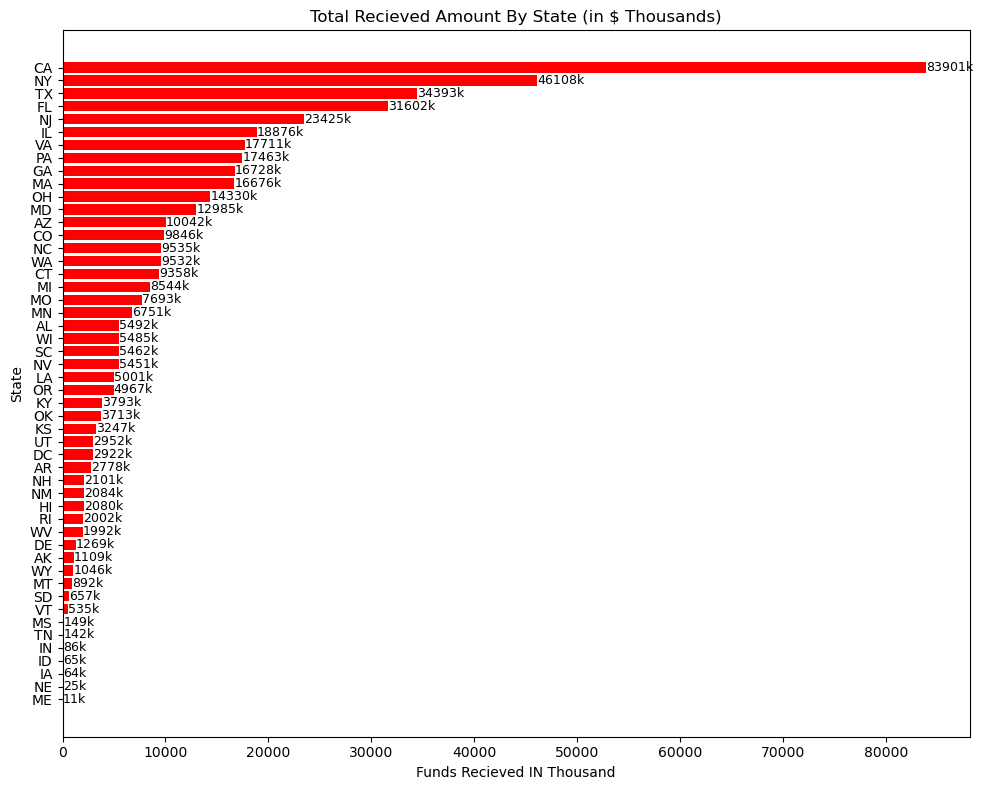

In [22]:
state_recieved = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_recieved_thousand = state_recieved / 1000

plt.figure(figsize=(10,8))
bar =plt.barh(state_recieved_thousand.index , state_recieved_thousand.values , color = 'red')

for bars in bar :
    width = bars.get_width()
    plt.text(width + 10 , bars.get_y() + bars.get_height() / 2 ,
             f'{width:.0f}k' , va ='center' , fontsize = 9)
    
plt.title('Total Recieved Amount By State (in $ Thousands)')
plt.ylabel('State')
plt.xlabel('Funds Recieved IN Thousand')
plt.tight_layout()
plt.show()

### Total loan Application By State

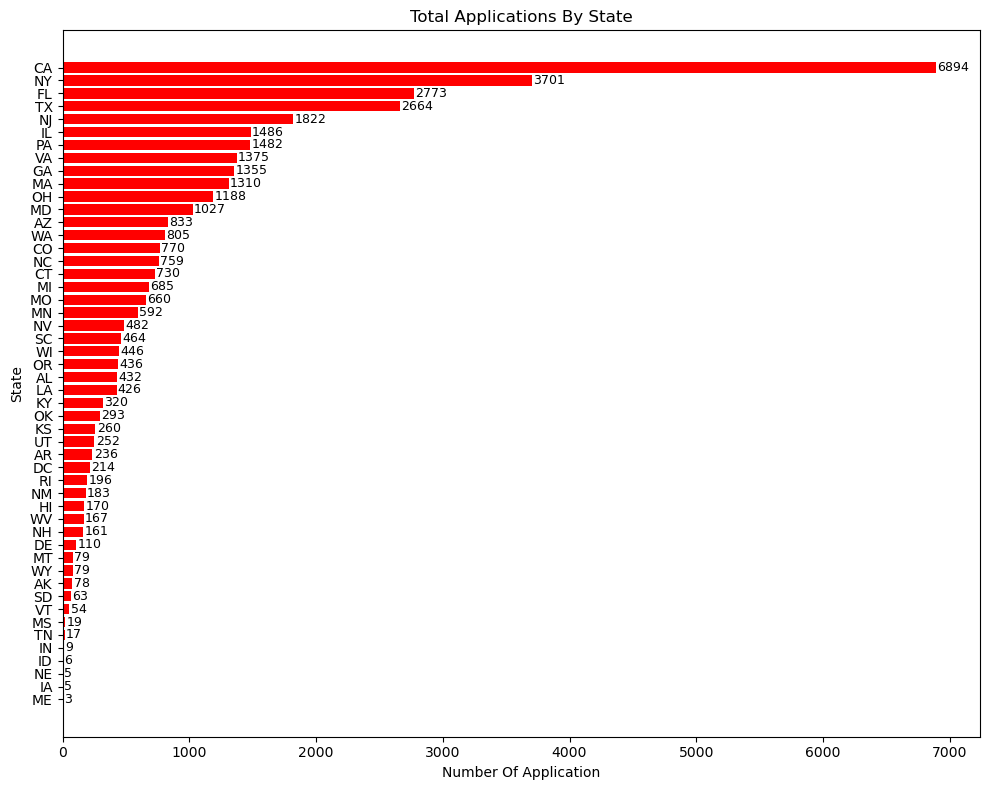

In [23]:
state_application = df.groupby('address_state')['id'].count().sort_values(ascending=True)


plt.figure(figsize=(10,8))
bar =plt.barh(state_application.index , state_application.values , color = 'red')

for bars in bar :
    width = bars.get_width()
    plt.text(width + 10 , bars.get_y() + bars.get_height() / 2 ,
             f'{width}' , va ='center' , fontsize = 9)
    
plt.title('Total Applications By State')
plt.ylabel('State')
plt.xlabel('Number Of Application')
plt.tight_layout()
plt.show()

### Loan Term Analysis By Total Funded Amount

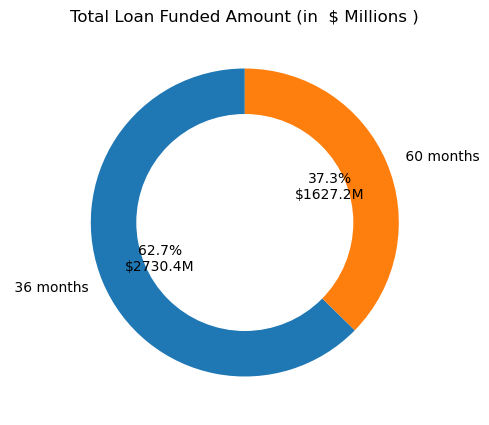

In [24]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 100000

plt.figure(figsize=(5 ,5 ))
plt.pie(
    term_funding_millions , 
    labels=term_funding_millions.index , 
    autopct= lambda p : f"{ p :.1f}%\n${p * sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops= {'width': 0.4} 
)

plt.gca().add_artist(plt.Circle((0,0),0.70 ,color ='white'))
plt.title("Total Loan Funded Amount (in  $ Millions )")
plt.show()


### Term Analysis By Received Amount

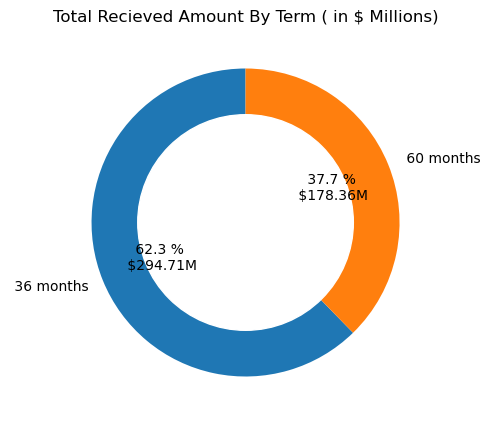

In [25]:
term_recieved_amount_millions = df.groupby('term')['total_payment'].sum() / 1000000 

plt.figure(figsize=(5,5))
plt.pie(
    term_recieved_amount_millions ,
    labels = term_recieved_amount_millions.index ,
    autopct= lambda p :f"{p : .1f} % \n ${p * sum(term_recieved_amount_millions)/100 :.2f}M",
    startangle=90 ,
    wedgeprops= {'width': 0.4}
    )
plt.gca().add_artist( plt.Circle((0,0) , 0.70, color = 'white'))
plt.title("Total Recieved Amount By Term ( in $ Millions)")
plt.show()

### Total Loan Application By Term 

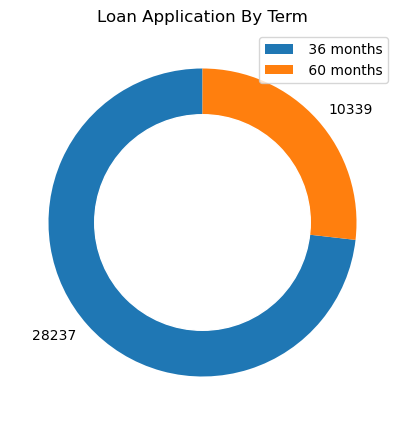

In [26]:
term_Loan_Application = df.groupby('term')['id'].count()


plt.figure(figsize=(5,5))
plt.pie(
    term_Loan_Application, 
    labels= term_Loan_Application, 
  
    wedgeprops={'width':0.4},
    startangle=90
)

plt.gca().add_artist(plt.Circle((0,0) ,0.70 , color ='white'))
plt.title("Loan Application By Term")
plt.legend(term_Loan_Application.index , loc = 1)
plt.show()

### Employee Length Analysis

### for Funded Amount

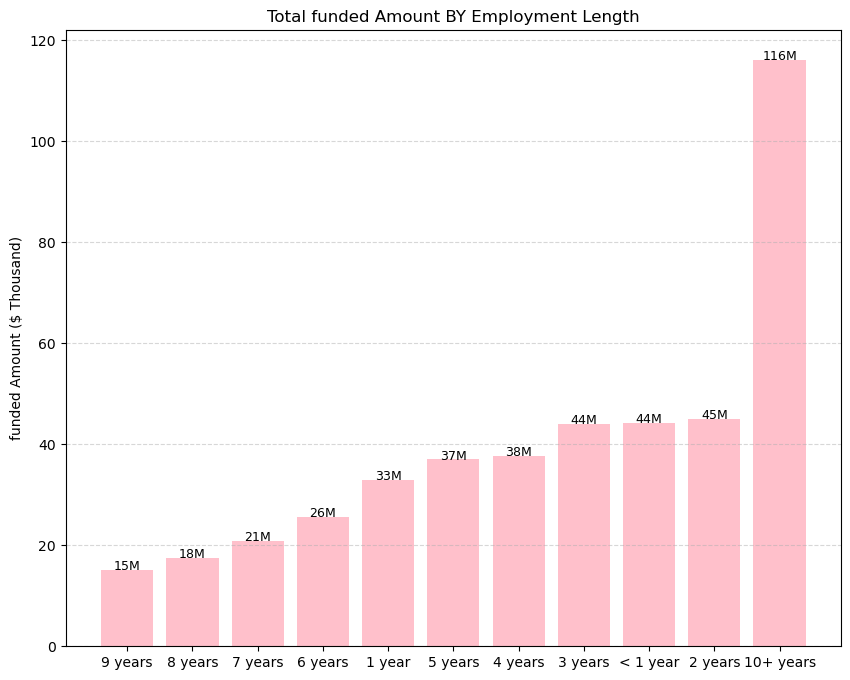

In [27]:
emp_len_funded = df.groupby('emp_length')['loan_amount'].sum().sort_values(ascending=True) / 1000000

plt.figure(figsize=(10,8))
bars =plt.bar(emp_len_funded.index , emp_len_funded , color ='pink' )

for bar in bars :
    height = bar.get_height()
    plt.text( bar.get_x() + bar.get_width()/2 ,height  ,
            f"{height:.0f}M" , ha ="center" , fontsize= 9)
    
plt.ylabel("funded Amount ($ Thousand)")
plt.title("Total funded Amount BY Employment Length")
plt.grid(axis= 'y' , linestyle ='--' , alpha = 0.5)
plt.show()






### Employee Length Analysis By Recieved Amount

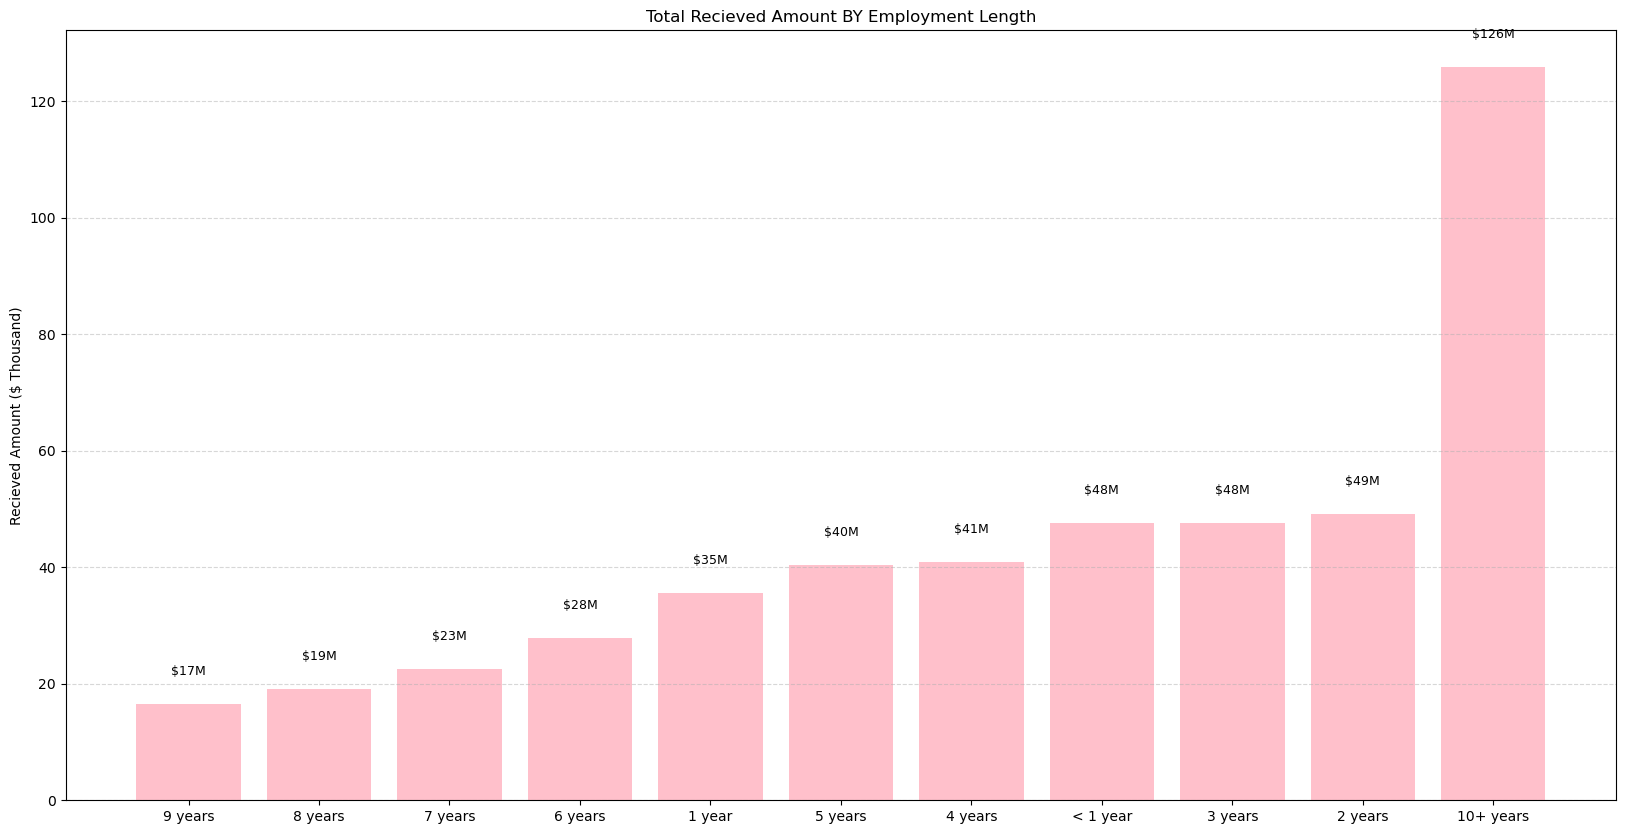

In [28]:
emp_len_rec = df.groupby('emp_length')['total_payment'].sum().sort_values(ascending=True)/1000000

plt.figure(figsize=(20,10))
bars = plt.bar(emp_len_rec.index , emp_len_rec , color ='pink' )

for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, height + 5,
             f"${height:.0f}M" , ha = 'center', fontsize = 9 )
    
plt.ylabel("Recieved Amount ($ Thousand)")
plt.title("Total Recieved Amount BY Employment Length")
plt.grid(axis= 'y' , linestyle ='--' , alpha = 0.5)
plt.show()

### employee length Analysis By No Of Application

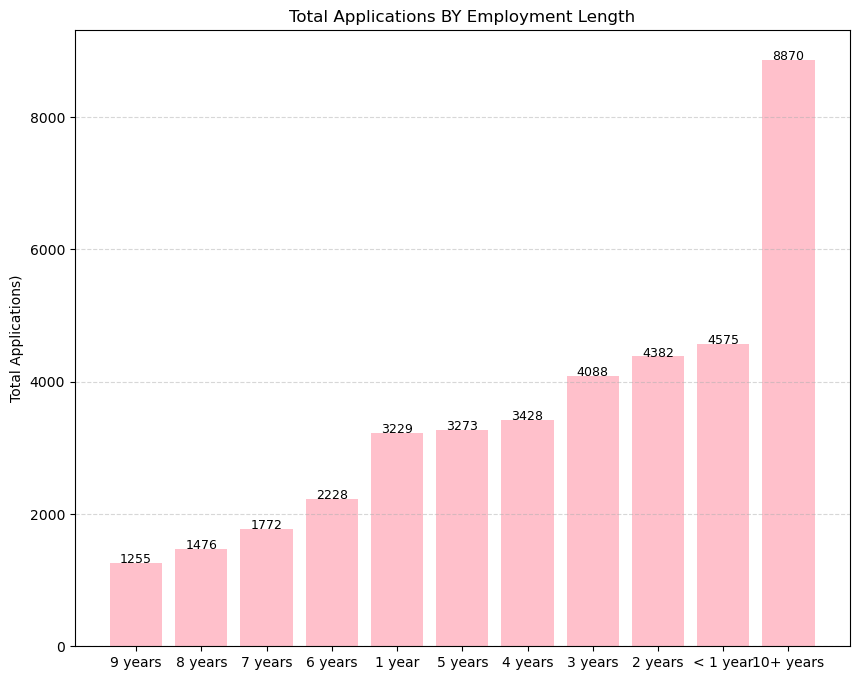

In [29]:
emp_len_app = df.groupby('emp_length')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,8))
bars = plt.bar(emp_len_app.index , emp_len_app , color = 'pink') 

for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2 , height , 
             f"{height}", ha = 'center' , fontsize = 9)
    
plt.ylabel("Total Applications)")
plt.title("Total Applications BY Employment Length")
plt.grid(axis= 'y' , linestyle ='--' , alpha = 0.5)
plt.show()
    

### Loan Purpose Analysis

### on the Basis Funded Amount

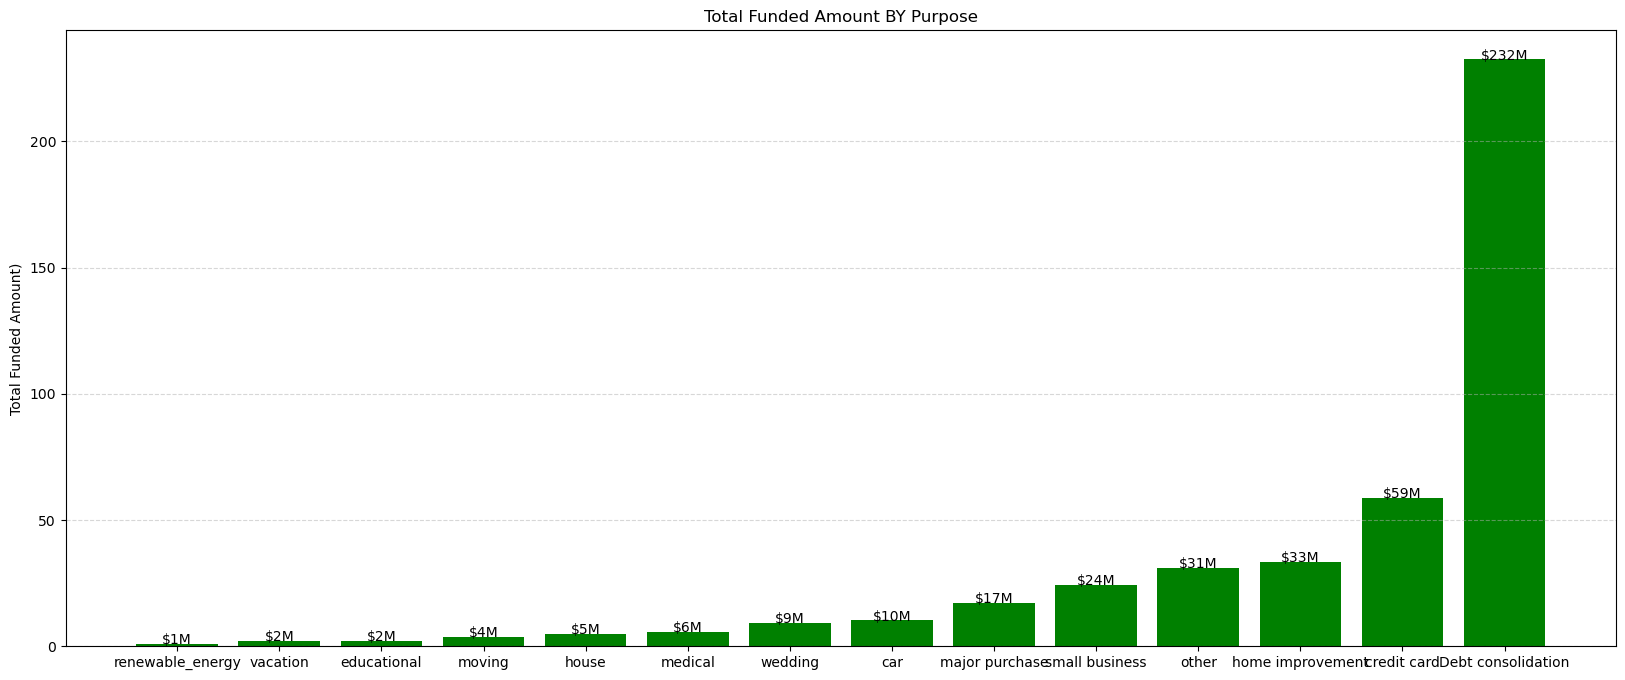

In [30]:
loan_pur_funded = df.groupby('purpose')['loan_amount'].sum().sort_values(ascending=True)/1000000

plt.figure(figsize=(20,8))
bars = plt.bar(loan_pur_funded.index , loan_pur_funded , color = 'green')

for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , height , f"${height:.0f}M" , ha = 'center' ,fontsize = 10)

plt.ylabel("Total Funded Amount)")
plt.title("Total Funded Amount BY Purpose")
plt.grid(axis= 'y' , linestyle ='--' , alpha = 0.5)

plt.show()

    

### ### on the Basis Recieved Amount

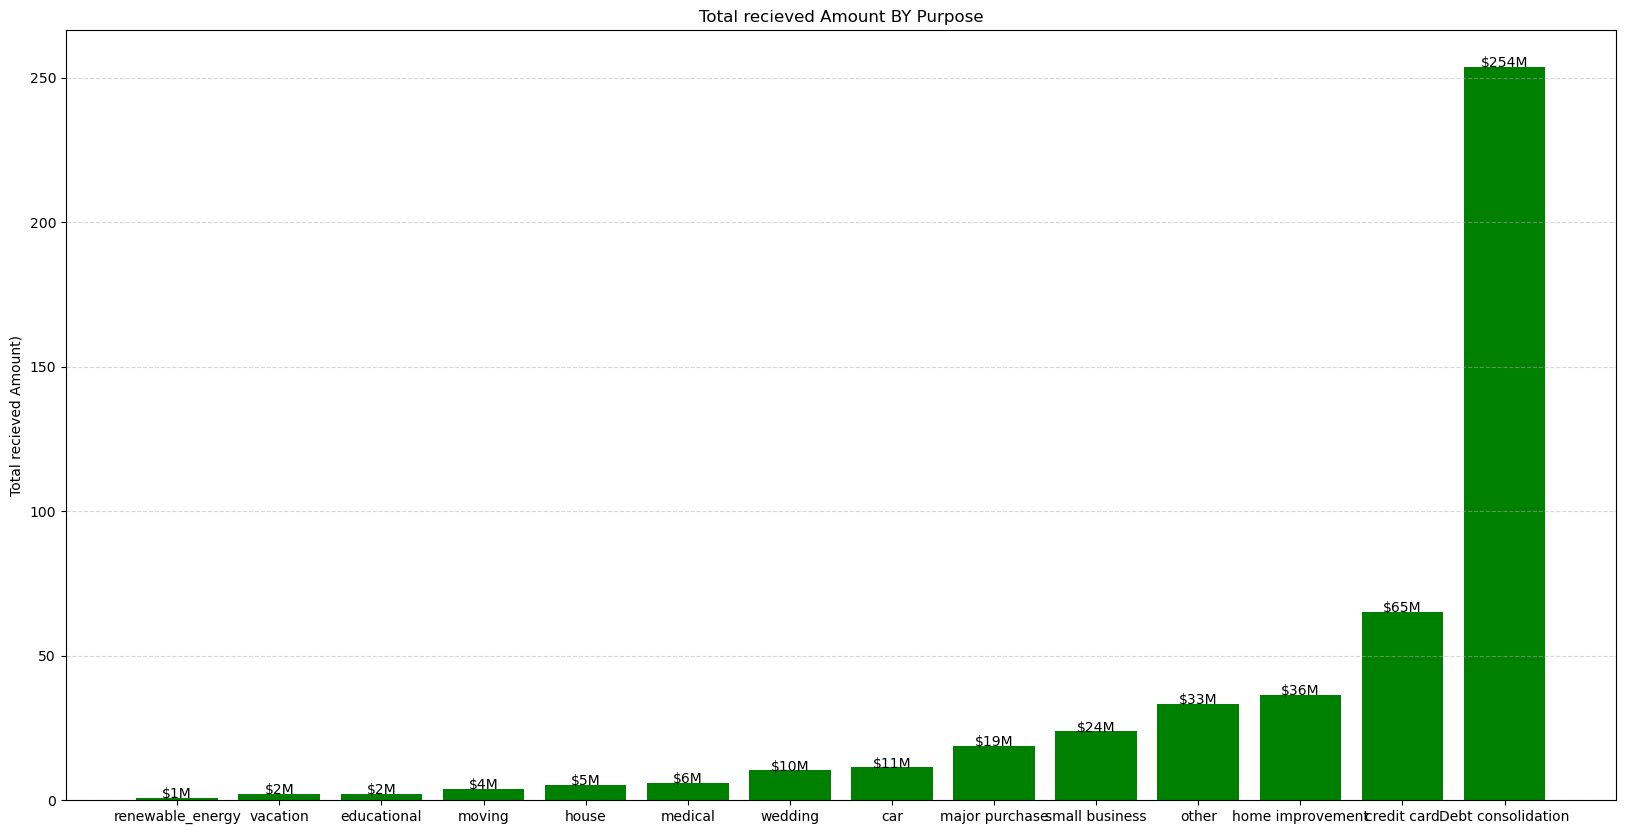

In [31]:
loan_pur_rec = df.groupby('purpose')['total_payment'].sum().sort_values(ascending=True)/1000000

plt.figure(figsize=(20,10))
bars = plt.bar(loan_pur_rec.index , loan_pur_rec , color = 'green')

for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , height , f"${height:.0f}M" , ha = 'center' ,fontsize = 10)

plt.ylabel("Total recieved Amount)")
plt.title("Total recieved Amount BY Purpose")
plt.grid(axis='y' , linestyle ='--' , alpha = 0.5)

plt.show()

### loan purpose analysis by total Applications

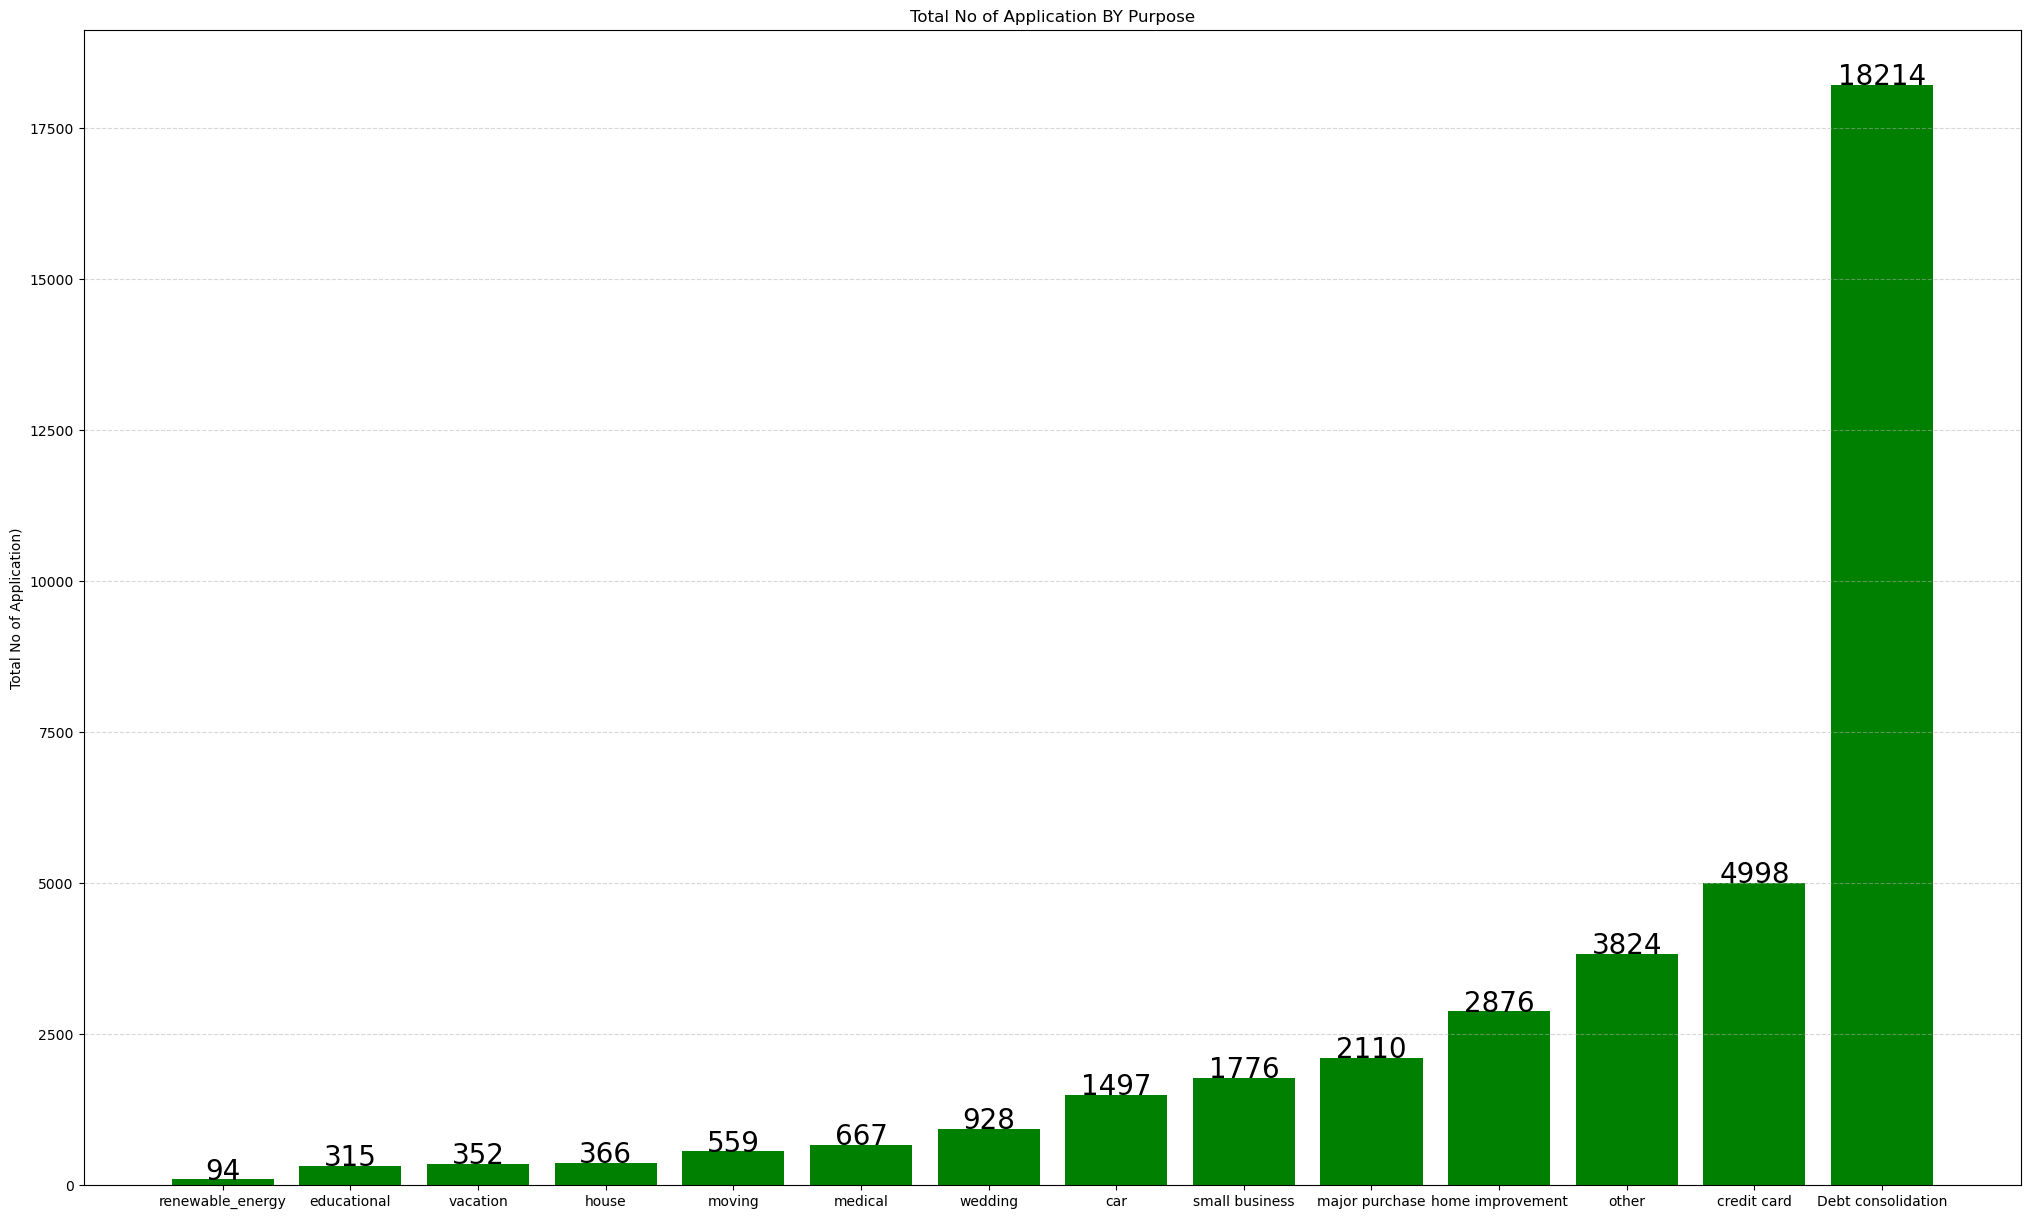

In [32]:
loan_pur_app = df.groupby('purpose')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(25,15))
bars = plt.bar(loan_pur_app.index , loan_pur_app , color = 'green')

for bar in bars :
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , height , f"{height}" , ha = 'center' ,fontsize = 20)

plt.ylabel("Total No of Application)")
plt.title("Total No of Application BY Purpose")
plt.grid(axis='y' , linestyle ='--' , alpha = 0.5)

plt.show()

### Home OwnerShip Analysis By Funded Amount

In [34]:
home_fund = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_fund['loan_amount_millions']= home_fund['loan_amount'] / 1000000

fig = px.treemap(
    home_fund,
    path = ['home_ownership'],
    values= 'loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale ='blues',
    title = 'Total Funded Amount By Home Ownership'

)

fig.show()

### home ownership Analysis By Recieved Amount

In [ ]:
home_fund_rec= df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_fund_rec['rec_amount_millions']= home_fund_rec['total_payment'] / 1000000 

fig = px.treemap(
    home_fund_rec,
    path = ['home_ownership'],
    values= 'rec_amount_millions',
    color='rec_amount_millions',
    color_continuous_scale ='blues',
    title = 'Total Recieved Amount By Home Ownership'

)

fig.show()

### home ownership Analysis By No of Applications

In [ ]:
home_owners_app = df.groupby('home_ownership')['id'].count().reset_index()
home_owners_app['home_owners_count'] = home_owners_app['id']


fig= px.treemap(
    home_owners_app,
    path = ['home_ownership'],
    values= 'home_owners_count',
    color='home_owners_count',
    color_continuous_scale='blues',
    title = 'Loan Application Analysis By Home Ownership'
    labels=
)

fig.show()